# nnDetection Summary Report

In [8]:
import pandas as pd
import seaborn as sns
from pathlib import Path

## Read Experiment Tables 

Read Experiment Tables and concatenate them in one single Pandas DataFrame. In the ``experiments`` Dict, the keys represent the Experiment names, with the values indicating the labels to be used in the plots.

In [10]:
class_name = "LYMPHOMA"
experiments = {
        "Task106_AutoPET_nnDet_3D_fullres":"Retina U-Net",
        "Task107_AutoPET_nnDet_3D_fullres_BT": "Retina U-Net + BT",
        "Task108_AutoPET_nnDet_3D_fullres_SE": "Retina U-Net + SE",
        "Task109_AutoPET_nnDet_3D_fullres_SEBT": "Retina U-Net + BT + SE"
}

results_folder = "<RESULT_FOLDER>"
df_list = []
for experiment in experiments:
    temp_df = pd.read_excel(Path(results_folder).joinpath(f"{experiment}.xlsx"),index_col=0,
                            #sheet_name=f"Object Detection-{class_name}"
                            sheet_name=f"Object Detection"
                           )
    temp_df["Experiment"]= experiments[experiment]
    df_list.append(temp_df)

df = pd.concat(df_list,ignore_index=True)

## Plot for Object Detection Metric

In [11]:
metric = "mAP_IoU_0.10_0.50_0.05_MaxDet_100" 

| Experiment             |   Score |
|:-----------------------|--------:|
| Retina U-Net           |   0.44  |
| Retina U-Net + BT      |   0.483 |
| Retina U-Net + BT + SE |   0.473 |
| Retina U-Net + SE      |   0.462 |


[Text(0.5, 0, 'Experiment'), Text(0, 0.5, 'mAP'), Text(0.5, 1.0, 'Global mAP')]

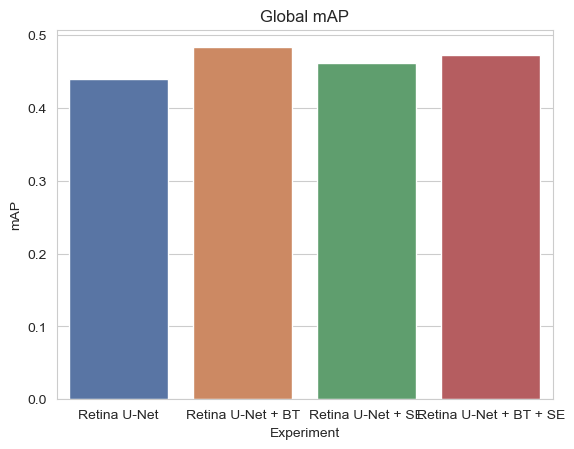

In [23]:
print(df[df["Metric"]==metric][["Score","Experiment"]].groupby("Experiment").mean().round(3).to_markdown())

#ax = sns.boxplot(df[df["Metric"]==metric][["Score","Experiment"]],x="Experiment",y="Score",palette="deep")

ax = sns.barplot(df[df["Metric"]==metric],x="Experiment",y="Score",palette="deep")

ax.set(xlabel='Experiment',
       ylabel='mAP',
       title='Global mAP')


## Evaluate Statistical Significance of Results

Compute *paired t-test*, given the specified *p-value*. ``pre_experiment`` and ``post_experiment`` are used to specify the tested experiments.

In [15]:
p_value = 0.05

pre_experiment = "Retina U-Net + SE"
post_experiment = "Retina U-Net + BT + SE"

In [16]:
import scipy.stats as stats

In [18]:
pre = df[(df["Metric"]==metric) & (df["Experiment"]== pre_experiment)]

post = df[(df["Metric"]==metric) & (df["Experiment"]== post_experiment)]

In [37]:
significant = stats.ttest_rel(pre["Score"].values, post["Score"].values).pvalue < p_value

print("H0 {}[{} = {}]: {}".format(metric,pre_experiment,post_experiment, not significant))

H0 mAP_IoU_0.10_0.50_0.05_MaxDet_100[Retina U-Net + SE = Retina U-Net + BT + SE]: True


## Segmentation

In [46]:
experiments = {
        "Task106_AutoPET_nnDet_3D_fullres":"Retina U-Net",
        "Task107_AutoPET_nnDet_3D_fullres_BT": "Retina U-Net + BT",
        "Task108_AutoPET_nnDet_3D_fullres_SE": "Retina U-Net + SE",
        "Task109_AutoPET_nnDet_3D_fullres_SEBT": "Retina U-Net + BT + SE"
}

results_folder = "<RESULT_FOLDER>"
df_list = []
for experiment in experiments:
    temp_df = pd.read_excel(Path(results_folder).joinpath(f"{experiment}.xlsx"),index_col=0,
                            #sheet_name=f"Object Detection-{class_name}"
                            sheet_name=f"Segmentation"
                           )
    temp_df["Experiment"]= experiments[experiment]
    df_list.append(temp_df)

df = pd.concat(df_list,ignore_index=True)

In [39]:
print(df.groupby("Experiment")["Score"].mean().to_markdown())

| Experiment             |    Score |
|:-----------------------|---------:|
| Retina U-Net           | 0.649185 |
| Retina U-Net + BT      | 0.643724 |
| Retina U-Net + BT + SE | 0.608784 |
| Retina U-Net + SE      | 0.585995 |


## Evaluate Statistical Significance of Segmentation Results

In [43]:
p_value = 0.05

pre_experiment = "Retina U-Net + SE"
post_experiment = "Retina U-Net + BT"

In [44]:
pre = df[df["Experiment"]==pre_experiment].dropna()

post = df[df["Experiment"]==post_experiment].dropna()

In [45]:
significant = stats.ttest_rel(pre["Score"].values, post["Score"].values).pvalue < 0.05

print("H0 {}[{} = {}]: {}".format("Dice",pre_experiment,post_experiment, not significant))

H0 Dice[Retina U-Net + SE = Retina U-Net + BT]: False
